## Fashion MNIST T-SNE Implementation
### References
https://medium.com/@luckylwk/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b
https://deeplearning-math.github.io/slides/Project1_WuXuLee.pdf

In [58]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

init_notebook_mode(connected=True)

2.7.0


In [60]:
import numpy as np
from sklearn.datasets import fetch_mldata

# mnist = fetch_mldata("MNIST original")
# X = mnist.data / 255.0
# y = mnist.target

# print(X.shape, y.shape)

In [61]:
# Replace with Fashion MNIST
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(x_train.shape, y_train.shape)


(60000, 28, 28) (60000,)


In [62]:
#Reshape to make 1-Dimensional
x_data = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])

In [63]:
# import pandas as pd

# feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]

# df = pd.DataFrame(X,columns=feat_cols)
# df['label'] = y
# df['label'] = df['label'].apply(lambda i: str(i))

# X, y = None, None

# print('Size of the dataframe: {}'.format(df.shape))

# Import Fashion MNIST

In [64]:
import pandas as pd

feat_cols = [ 'pixel'+str(i) for i in range(x_data.shape[1]) ]

df = pd.DataFrame(x_data,columns=feat_cols)
df['label'] = y_train
df['label'] = df['label'].apply(lambda i: str(i))

print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (60000, 785)


In [65]:
df.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,0.000800,0.005783,0.030083,0.103800,0.249683,0.414717,0.821667,2.224733,5.698667,14.434650,...,34.564367,23.208633,16.576250,17.831967,22.918850,17.916900,8.485717,2.706333,0.819000,0.070883
std,0.092554,0.249033,0.767868,2.512017,4.331376,5.827394,8.309935,14.201820,23.835980,38.204702,...,57.557779,48.881430,42.044318,43.911297,51.928401,45.173634,29.448614,17.258682,9.133252,2.075829
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,57.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,16.000000,36.000000,119.000000,164.000000,224.000000,230.000000,221.000000,221.000000,254.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.000000


In [66]:
rndperm = np.random.permutation(df.shape[0])

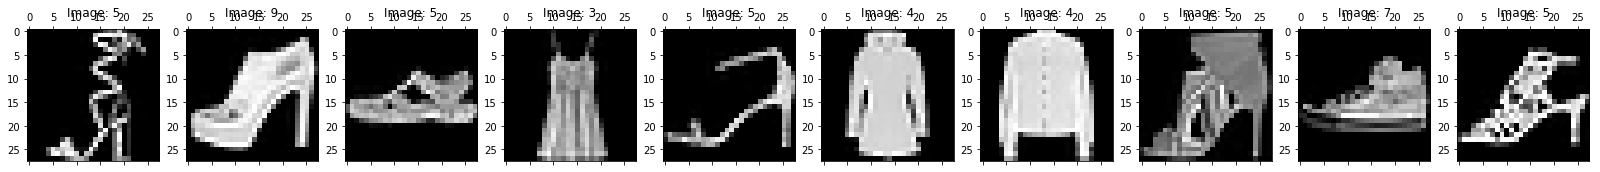

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(28,28) )
for i in range(0,10):
    ax = fig.add_subplot(3,10,i+1, title='Image: ' + str(df.loc[rndperm[i],'label']) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

In [ ]:
import time

from sklearn.manifold import TSNE

n_sne = 14000

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df.loc[rndperm[:n_sne],feat_cols].values)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...


In [70]:
df_tsne = df.loc[rndperm[:n_sne],:].copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

from ggplot import *

chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='label') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("tSNE dimensions colored by digit")
chart

ValueError: Length of values does not match length of index

In [71]:
import plotly.graph_objs as go
import plotly.plotly as py

trace0 = go.Scatter(
    x = df_tsne['x-tsne'],
    y = df_tsne['y-tsne'],
    name = 'Above',
    mode = 'markers',
    marker=dict(
        size='16',
        color = df_tsne['label'], #set color equal to a variable
        colorscale='Viridis',
        showscale=True
    )
)
data = [trace0]
iplot(data)

KeyError: 'x-tsne'